<a href="https://colab.research.google.com/github/c-mmonteiro/t2-aprendizado/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 de Aprendizado de Máquina

Autor: Carlos A. M. Monteiro

## 1 Carregamento dos dados e EDA inicial

1. Baixe e carregue os dados a partir do Kaggle
link: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?datasetId=2066095&sortBy=voteCount

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.23M/1.23M [00:00<00:00, 1.53MB/s]

Extracting files...
Path to dataset files: /home/carlos-monteiro/.cache/kagglehub/datasets/yasserh/twitter-tweets-sentiment-dataset/versions/1


In [3]:
import pandas as pd
dados = pd.read_csv(path + "/Tweets.csv")
dados.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


2. Crie a variável alvo conforme a Tabela 1 e salve no dataset (por exemplo como target)

In [4]:
dados['target'] = dados['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
dados

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,1
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0


3. Observe se existem dados faltantes ou duplicados

In [5]:
print(f'Dados Faltantes:\n{dados.isnull().sum()}')
print(f'Linhas duplicadas:', dados.duplicated().sum())

Dados Faltantes:
textID           0
text             1
selected_text    1
sentiment        0
target           0
dtype: int64
Linhas duplicadas: 0


4. Plote um histograma do número dos caracteres dos reviews

Text(0, 0.5, 'Frequência')

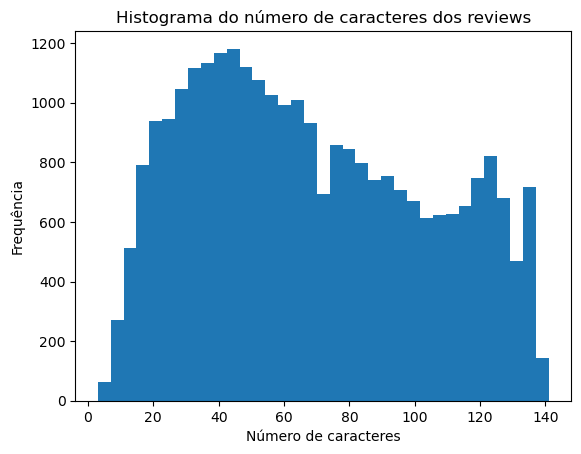

In [6]:
import matplotlib.pyplot as plt
import numpy as np

dados['text_str'] = dados['text'].astype(str)
dados['text_len'] = dados['text_str'].apply(len)

# Usando a regra de Freedman-Diaconis para determinar o número de bins
bins = int((np.max(dados['text_len']) - np.min(dados['text_len'])) / (2 * (np.percentile(dados['text_len'], 75) - np.percentile(dados['text_len'], 25)) * len(dados['text_len'])**(-1/3)))

plt.hist(dados['text_len'], bins=bins)
plt.title('Histograma do número de caracteres dos reviews')
plt.xlabel('Número de caracteres')
plt.ylabel('Frequência')

5. Plote um histograma do número de palavras dos reviews

Text(0, 0.5, 'Frequência')

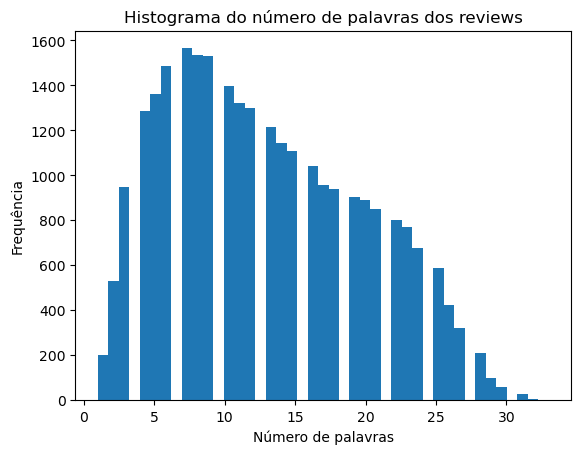

In [7]:
dados['word_count'] = dados['text_str'].apply(lambda x: len(x.split()))

bins = int((np.max(dados['word_count']) - np.min(dados['word_count'])) / (2 * (np.percentile(dados['word_count'], 75) - np.percentile(dados['word_count'], 25)) * len(dados['word_count'])**(-1/3)))

plt.hist(dados['word_count'], bins=bins)
plt.title('Histograma do número de palavras dos reviews')
plt.xlabel('Número de palavras')
plt.ylabel('Frequência')

6. Mostre os 5 maiores e menores comentários e o sentimento relacionado

In [10]:
comentarios_ordenados = dados[['text', 'text_len', 'sentiment']].sort_values('text_len', ascending=False)

print('5 maiores comentários:')
print(comentarios_ordenados.head(5))

print('\n5 menores comentários:')
print(comentarios_ordenados.tail(5))

5 maiores comentários:
                                                    text  text_len sentiment
3138   Is so freaking bored on the bus. Hate being po...       141  negative
27318  just saw an advert for ATTICS TO EDEN on tv  o...       141   neutral
13896  Feeling madly sorry for myself... - ï¿½Iï¿½M S...       140  negative
2582   TODAy SUCKs - kisskass19: ï¿½you and katey bro...       139  negative
16851  4 novos followers http://migre.me/SfN Sorry, t...       139  negative

5 menores comentários:
      text  text_len sentiment
25699   ME         3   neutral
11524   aw         3   neutral
641     no         3   neutral
314    NaN         3   neutral
26005    ?         3   neutral


7. Mostre um WordCloud com todo o texto dos reviews (utilize a função WordCloud da biblioteca wordcloud)

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews')

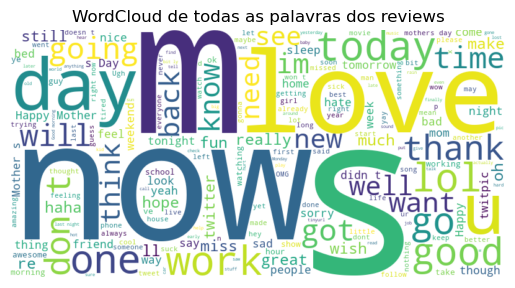

In [12]:
from wordcloud import WordCloud

texto_todos = ' '.join(dados['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews')

7.a) Repita somente para os comentários negativos

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews negativos')

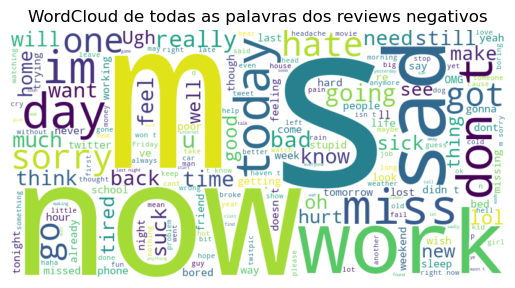

In [13]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'negative']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews negativos')

7.b) Repita somente para os comentários neutros

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews neutros')

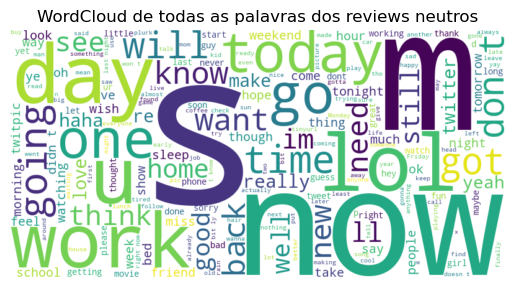

In [14]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'neutral']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews neutros')

7.c) Repita somente para os comentários positivos

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews positivos')

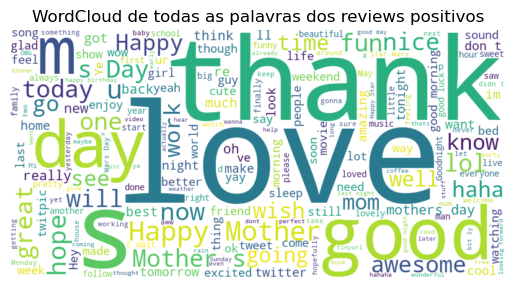

In [15]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'positive']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews positivos')

8. Mostre a distribuição da variável alvo através de um gráfico de barras

Text(0, 0.5, 'Frequência')

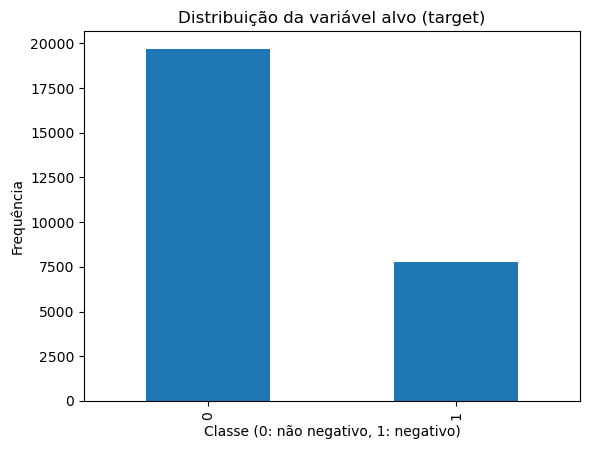

In [16]:

dados['target'].value_counts().plot(kind='bar')
plt.title('Distribuição da variável alvo (target)')
plt.xlabel('Classe (0: não negativo, 1: negativo)')
plt.ylabel('Frequência')

8.a) Repita mostrando a distribuição dos sentimentos originais (negativo, positivo e neutro)

Text(0, 0.5, 'Frequência')

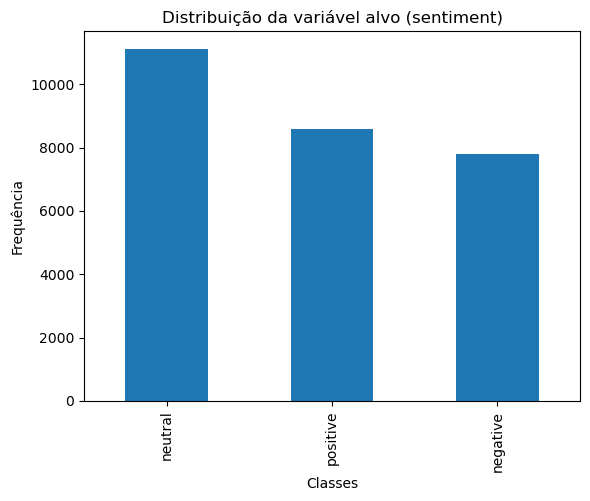

In [17]:
dados['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribuição da variável alvo (sentiment)')
plt.xlabel('Classes')
plt.ylabel('Frequência')

Visualizar os dados em forma de vetore


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

texto = dados['text'].astype(str)

vectorizer = CountVectorizer()
vectorizer.fit(texto)

texto_BoW = pd.DataFrame.sparse.from_spmatrix(
  vectorizer.transform(texto),
  columns=vectorizer.get_feature_names_out())
texto_BoW

,00,000,000th,00am,00pm,01,02,024,02mxjj,03,...,½tearï,½timo,½ureo,½ve,½why,½whyyy,½y,½you,½z,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Limpeza e separação dos dados

1. Remova as colunas extra do dataset, deixando somente as colunas text e target

In [19]:
dados = dados.drop(columns=['textID', 'selected_text', 'sentiment',
        'text_str', 'text_len', 'word_count'])

2. (Se necessário) Trate os dados faltantes ou duplicados

Como indicado acima, temos um dado faltante na coluna text e nenhum duplicado.

In [20]:
dados = dados.dropna().reset_index(drop=True)

3. Separe 20% do conjunto para teste utilizando a divisão estratificada com base na coluna target

In [21]:
from sklearn.model_selection import train_test_split


X_train_val, X_test, y_train_val, y_test = train_test_split(dados['text'], dados['target'], test_size=0.2)

4. Separar o conjunto de Validação


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

## 3. Seleção de hiperparâmetros

Otimização com validação por hold-out

**Opção**: Pela otimização pelo uso de validação Hold-out uma vez que, no meu entendimento, o conjunto de dados tem tamanho suficiente isso.

**(Pipeline de pré-processamento)**
1. Nesta etapa, defina a pipeline de pré-processamento como sendo somente o CountVectorizer com seus parâmetros padrão

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = make_pipeline(CountVectorizer(), LogisticRegression())

### 3.2 Regressão Logística

**(Seleção de hiperparâmetros)**

a) Treine um modelo de regressão logística com os parâmetros padrão


In [24]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))



Acurácia no conjunto de treino: 0.9251151418661512
Acurácia no conjunto de validação: 0.8262451671594269


b) Realize a otimização de hiperparâmetros (usando GridSearch)


In [25]:
def grid_search_holdout_pipeline_LR(param_grid, X_train, y_train, X_val, y_val):
  val_index = [-1]*len(X_train) + [0]*len(X_val)

  model = make_pipeline(CountVectorizer(),
                        GridSearchCV(LogisticRegression(max_iter=1000), param_grid,
                                    refit=False, cv=PredefinedSplit(val_index)))

  model.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])

  return model


In [26]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit


param_grid = {'C':     np.arange(0.1, 10, 0.2)}

model = grid_search_holdout_pipeline_LR(param_grid, X_train, y_train, X_val, y_val)

print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)

Melhor parâmetro: {'C': np.float64(1.5000000000000004)}
Melhor acurácia: 0.8282920172845122


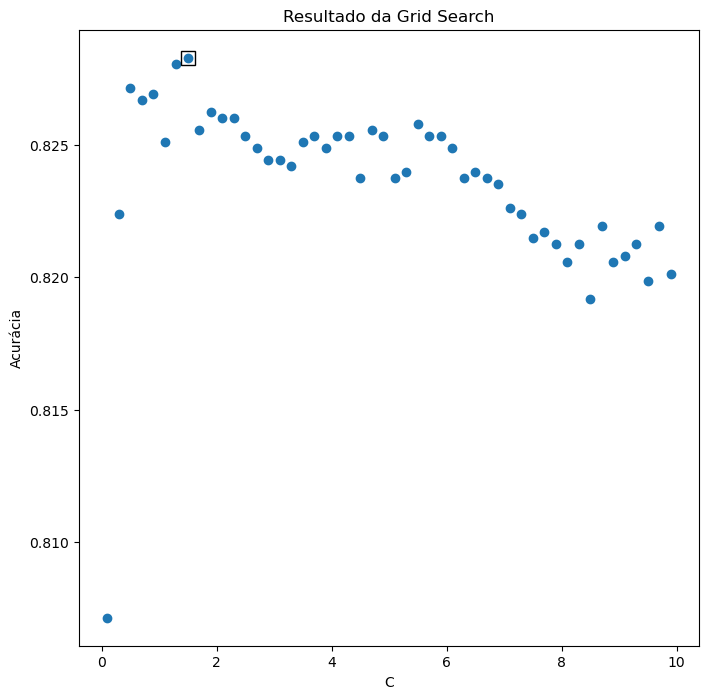

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(model[1].cv_results_['param_C'],
            model[1].cv_results_['mean_test_score'])
plt.plot(model[1].best_params_['C'],
         model[1].best_score_,
         'ks', mfc='none', markersize=10)
plt.title('Resultado da Grid Search')
plt.xlabel('C')
plt.ylabel('Acurácia')
plt.show()

Considerando que o melhor valor encontrado é um pico com pontos para ambos os lados, não há necessidade de alteração do intervalo de busca.

Otimização usando Optuna (extra)

In [28]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [optuna]2m3/4 [optuna]]


In [29]:
def objective(trial):

  c = trial.suggest_float("c", 0.1, 10.0)
  #tol = trial.suggest_float('tol', 0.00001, 10.0)

  model = make_pipeline(CountVectorizer(), LogisticRegression(C=c, max_iter=1000))
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)

  return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-29 19:05:09,726] A new study created in memory with name: no-name-67c9702f-d7ad-4aa7-91c2-3fcf9d0f81d1


[I 2025-09-29 19:05:10,338] Trial 0 finished with value: 0.8248806004093701 and parameters: {'c': 6.124696882220451}. Best is trial 0 with value: 0.8248806004093701.
[I 2025-09-29 19:05:10,817] Trial 1 finished with value: 0.8237434614509893 and parameters: {'c': 3.102802677692103}. Best is trial 0 with value: 0.8248806004093701.
[I 2025-09-29 19:05:11,336] Trial 2 finished with value: 0.8241983170343415 and parameters: {'c': 3.2292523984841437}. Best is trial 0 with value: 0.8248806004093701.
[I 2025-09-29 19:05:11,883] Trial 3 finished with value: 0.826472594951103 and parameters: {'c': 4.688441101092727}. Best is trial 3 with value: 0.826472594951103.
[I 2025-09-29 19:05:12,447] Trial 4 finished with value: 0.8228337502842847 and parameters: {'c': 7.0541826895874165}. Best is trial 3 with value: 0.826472594951103.
[I 2025-09-29 19:05:12,950] Trial 5 finished with value: 0.8244257448260177 and parameters: {'c': 3.6602537985102046}. Best is trial 3 with value: 0.826472594951103.
[I 20

###################################
Melhor parâmetro: {'c': 1.4246785549319265}
Melhor acurácia: 0.8282920172845122


### 3.3. SVM com kernel RBF

a) Treine com os parâmetros padrão

In [30]:
from sklearn.svm import SVC


model = make_pipeline(CountVectorizer(), SVC(kernel='rbf'))
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.9296639563313811
Acurácia no conjunto de validação: 0.8069138048669547


b) Realize a otimização de hiperparâmetros com Optuna (SVM é muito pesado)

In [ ]:
def objective(trial):

    c = trial.suggest_float("c", 0.001, 10.0)
    gamma = trial.suggest_float("gamma", 0.0001, 10.0)

    model = make_pipeline(CountVectorizer(), SVC(C = c, gamma=gamma, kernel='rbf'))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-27 12:47:58,138] A new study created in memory with name: no-name-b0caed30-43a7-4258-83c4-f4f7cf42744d
[I 2025-09-27 12:53:25,434] Trial 0 finished with value: 0.7177621105299068 and parameters: {'c': 8.639817701571102, 'gamma': 7.649751521779606}. Best is trial 0 with value: 0.7177621105299068.
[I 2025-09-27 12:56:16,375] Trial 1 finished with value: 0.7170798271548783 and parameters: {'c': 0.3985154845558097, 'gamma': 2.894080020918426}. Best is trial 0 with value: 0.7177621105299068.
[I 2025-09-27 12:59:39,886] Trial 2 finished with value: 0.7177621105299068 and parameters: {'c': 0.9953144773358086, 'gamma': 5.982882678857448}. Best is trial 0 with value: 0.7177621105299068.
[I 2025-09-27 13:04:32,045] Trial 3 finished with value: 0.718216966113259 and parameters: {'c': 7.110129515132239, 'gamma': 2.607803192209613}. Best is trial 3 with value: 0.718216966113259.
[I 2025-09-27 13:09:55,606] Trial 4 finished with value: 0.7177621105299068 and parameters: {'c': 4.4018771656

###################################
Melhor parâmetro: {'c': 7.250538565695225, 'gamma': 0.02557543961607245}
Melhor acurácia: 0.8239708892426655


### 3.4. Árvore de Decisão

a) Treine com os parâmetros padrão

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(CountVectorizer(), DecisionTreeClassifier())
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.9997725592767385
Acurácia no conjunto de validação: 0.7873550147828065


b) Realize a otimização de hiperparâmetros

In [22]:
def grid_search_holdout_pipeline_DT(param_grid, X_train, y_train, X_val, y_val):
  val_index = [-1]*len(X_train) + [0]*len(X_val)

  model = make_pipeline(CountVectorizer(),
                        GridSearchCV(DecisionTreeClassifier(), param_grid,
                                    refit=False, cv=PredefinedSplit(val_index)))

  model.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])

  return model

In [ ]:
param_grid = {'max_depth':          np.arange(5, 100, 15),
              'min_samples_split':  np.arange(2, 10, 2),
              'min_samples_leaf':   np.arange(1, 10, 3)}

model = grid_search_holdout_pipeline_DT(param_grid, X_train, y_train, X_val, y_val)

print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)

Melhor parâmetro: {'max_depth': np.int64(35), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(8)}
Melhor acurácia: 0.7998635433249943


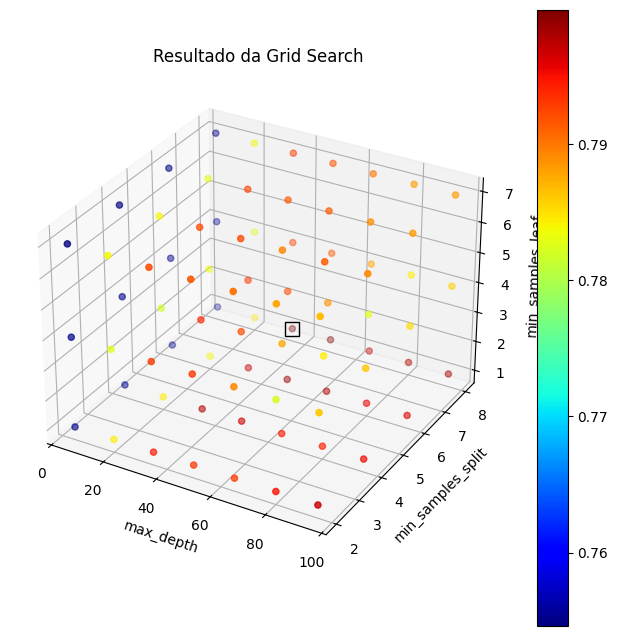

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')


scatter = ax.scatter(model[1].cv_results_['param_max_depth'],
                     model[1].cv_results_['param_min_samples_split'],
                     model[1].cv_results_['param_min_samples_leaf'],
                     c=model[1].cv_results_['mean_test_score'], cmap='jet')
ax.plot(model[1].best_params_['max_depth'],
        model[1].best_params_['min_samples_split'],
        model[1].best_params_['min_samples_leaf'],
        'ks', mfc='none', markersize=10)

plt.title('Resultado da Grid Search')
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
ax.set_zlabel('min_samples_leaf')
fig.colorbar(scatter)
plt.show()

Rodando novamente o Grid Search para verificar se o ponto ótimo não está além dos limites testados.

In [28]:
param_grid = {'max_depth':          np.arange(20, 80, 5),
              'min_samples_split':  np.arange(6, 15, 1),
              'min_samples_leaf':   np.arange(1, 4, 1)}

model = grid_search_holdout_pipeline_DT(param_grid, X_train, y_train, X_val, y_val)

print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)

Melhor parâmetro: {'max_depth': np.int64(65), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(11)}
Melhor acurácia: 0.8005458267000227


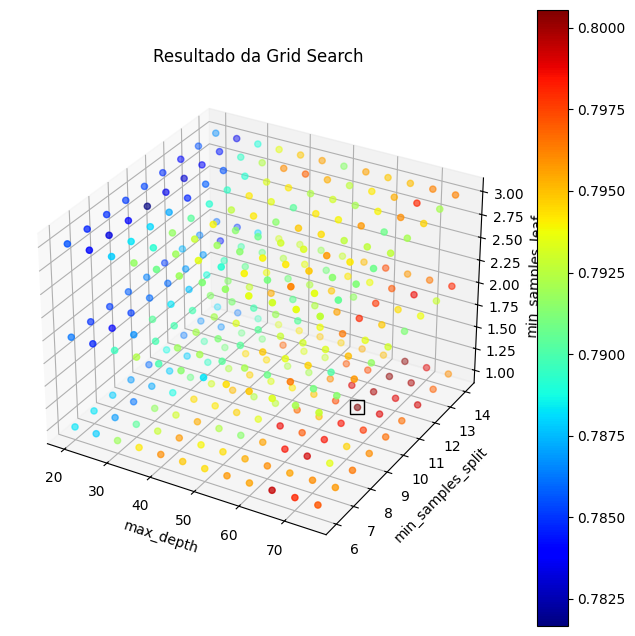

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')


scatter = ax.scatter(model[1].cv_results_['param_max_depth'],
                     model[1].cv_results_['param_min_samples_split'],
                     model[1].cv_results_['param_min_samples_leaf'],
                     c=model[1].cv_results_['mean_test_score'], cmap='jet')
ax.plot(model[1].best_params_['max_depth'],
        model[1].best_params_['min_samples_split'],
        model[1].best_params_['min_samples_leaf'],
        'ks', mfc='none', markersize=10)

plt.title('Resultado da Grid Search')
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
ax.set_zlabel('min_samples_leaf')
fig.colorbar(scatter)
plt.show()

In [ ]:
def objective(trial):

    max_depth = trial.suggest_int("max_depth", 5, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 15)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = make_pipeline(CountVectorizer(), DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)


[I 2025-09-26 02:01:52,400] A new study created in memory with name: no-name-075cd9d1-2067-43c2-9a7b-488a479faa6a
[I 2025-09-26 02:01:55,190] Trial 0 finished with value: 0.7855355924493973 and parameters: {'max_depth': 80, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7855355924493973.
[I 2025-09-26 02:01:55,841] Trial 1 finished with value: 0.7762110529906755 and parameters: {'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7855355924493973.
[I 2025-09-26 02:01:58,068] Trial 2 finished with value: 0.7900841482829202 and parameters: {'max_depth': 71, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.7900841482829202.
[I 2025-09-26 02:01:59,395] Trial 3 finished with value: 0.7928132817830339 and parameters: {'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.7928132817830339.
[I 2025-09-26 02:01:59,917] Trial 4 finished with value: 0.7

###################################
Melhor parâmetro: {'max_depth': 52, 'min_samples_split': 14, 'min_samples_leaf': 3}
Melhor acurácia: 0.8016829656584035


### 3.5. Floresta Aleatória

a) Treine com os parâmetros padrão

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(CountVectorizer(), RandomForestClassifier())
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.9997725592767385
Acurácia no conjunto de validação: 0.8178303388674096


b) Realize a otimização de hiperparâmetros

In [ ]:
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 10, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-26 02:11:30,106] A new study created in memory with name: no-name-4d3be4da-0445-4626-9f64-ee333f57baa0
[I 2025-09-26 02:11:32,643] Trial 0 finished with value: 0.7211735274050489 and parameters: {'n_estimators': 365, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7211735274050489.
[I 2025-09-26 02:11:41,626] Trial 1 finished with value: 0.7252672276552194 and parameters: {'n_estimators': 637, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7252672276552194.
[I 2025-09-26 02:11:52,865] Trial 2 finished with value: 0.724584944280191 and parameters: {'n_estimators': 877, 'max_depth': 40, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7252672276552194.
[I 2025-09-26 02:11:55,912] Trial 3 finished with value: 0.7211735274050489 and parameters: {'n_estimators': 535, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 1 with value

###################################
Melhor parâmetro: {'n_estimators': 879, 'max_depth': 100, 'min_samples_split': 6, 'min_samples_leaf': 1}
Melhor acurácia: 0.7944052763247669


### 3.6. Gradient Boosting

a) Treine com os parâmetros padrão

In [25]:
import xgboost as xgb

model = make_pipeline(CountVectorizer(), xgb.XGBClassifier())
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))

Acurácia no conjunto de treino: 0.8534713140387786
Acurácia no conjunto de validação: 0.8219240391175802


b) Realize a otimização de hiperparâmetros

In [30]:
def objective(trial):

    eta = trial.suggest_float("eta", 0, 1)
    gamma = trial.suggest_float("gamma", 0.1, 50)
    max_depth = trial.suggest_int("max_depth", 2, 10)

    model = make_pipeline(CountVectorizer(), xgb.XGBClassifier(max_depth=max_depth, eta=eta, gamma=gamma))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print('###################################')
print('Melhor parâmetro:', study.best_params)
print('Melhor acurácia:', study.best_value)

[I 2025-09-29 19:20:58,223] A new study created in memory with name: no-name-81ce3c2c-c685-4d0c-a1b9-22e49bfaeb61
[I 2025-09-29 19:21:02,468] Trial 0 finished with value: 0.8317034341596543 and parameters: {'eta': 0.6606541358458164, 'gamma': 0.6497158636332127, 'max_depth': 10}. Best is trial 0 with value: 0.8317034341596543.
[I 2025-09-29 19:21:02,989] Trial 1 finished with value: 0.8014555378667273 and parameters: {'eta': 0.7677830155798052, 'gamma': 48.73044174555835, 'max_depth': 5}. Best is trial 0 with value: 0.8317034341596543.
[I 2025-09-29 19:21:03,480] Trial 2 finished with value: 0.8016829656584035 and parameters: {'eta': 0.6393090616938443, 'gamma': 39.72810038291309, 'max_depth': 4}. Best is trial 0 with value: 0.8317034341596543.
[I 2025-09-29 19:21:04,105] Trial 3 finished with value: 0.8139640664089152 and parameters: {'eta': 0.4019525117604925, 'gamma': 12.912260926750648, 'max_depth': 3}. Best is trial 0 with value: 0.8317034341596543.
[I 2025-09-29 19:21:04,718] Tri

###################################
Melhor parâmetro: {'eta': 0.5025561147469514, 'gamma': 0.6876872207907362, 'max_depth': 9}
Melhor acurácia: 0.834432567659768


## 4. Retreinamento e resultados no conjunto de teste

a) Retreine o modelo com os melhores hiperparâmetros encontrados

b) Mostre a acurácia balanceada tanto no conjunto de treinamento (treinamento+validação) quanto no conjunto de teste

In [ ]:
def balanced_accuracy_score(y_true, y_pred):
    p = np.array([(y_true == i).mean() for i in np.unique(y_train)])
    return accuracy_score(y_true, y_pred, sample_weight=1/p[y_true])

### 4.1 Regressão Logística



In [32]:
model = make_pipeline(CountVectorizer(), LogisticRegression(C=1.5, max_iter=1000))
model.fit(X_train_val, y_train_val)

print(f'Train balanced accuracy: {balanced_accuracy_score(y_train_val, model.predict(X_train_val)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, model.predict(X_test)):.1%}')


Train balanced accuracy: 90.5%
 Test balanced accuracy: 75.4%


### 4.2 SVM com kernel RBF


In [34]:
from sklearn.svm import SVC

model = make_pipeline(CountVectorizer(), SVC(C = 7.25, gamma=0.025, kernel='rbf'))
model.fit(X_train_val, y_train_val)

print(f'Train balanced accuracy: {balanced_accuracy_score(y_train_val, model.predict(X_train_val)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, model.predict(X_test)):.1%}')

Train balanced accuracy: 95.0%
 Test balanced accuracy: 75.5%


### 4.3 Árvore de Decisão

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(CountVectorizer(), DecisionTreeClassifier(max_depth=52, min_samples_split=14, min_samples_leaf=3))
model.fit(X_train_val, y_train_val)

print(f'Train balanced accuracy: {balanced_accuracy_score(y_train_val, model.predict(X_train_val)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, model.predict(X_test)):.1%}')

Train balanced accuracy: 75.0%
 Test balanced accuracy: 68.5%


### 4.4 Floresta Aleatória



In [36]:
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=879, max_depth=100, min_samples_split=6, min_samples_leaf=1))
model.fit(X_train_val, y_train_val)

print(f'Train balanced accuracy: {balanced_accuracy_score(y_train_val, model.predict(X_train_val)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, model.predict(X_test)):.1%}')

Train balanced accuracy: 77.4%
 Test balanced accuracy: 61.0%


### 4.5 Gradient Boosting

In [37]:
model = make_pipeline(CountVectorizer(), xgb.XGBClassifier(max_depth=9, eta=0.5, gamma=0.68))
model.fit(X_train_val, y_train_val)

print(f'Train balanced accuracy: {balanced_accuracy_score(y_train_val, model.predict(X_train_val)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, model.predict(X_test)):.1%}')

Train balanced accuracy: 82.4%
 Test balanced accuracy: 74.5%


O melhor modelo encontrado para o conjunto de dados em análise é o **SVM com Kernel RBF** (com 0,1 de diferença para a Regressão Logística), considerando os modelos treinados nesta seção e o seu valor de acuracia balanceada no conjunto de teste.

## 5. Análise de resultados

### 5.1 Utilizando o modelo SVM com Kernel RBF

In [38]:
model = make_pipeline(CountVectorizer(), SVC(C = 7.25, gamma=0.025, kernel='rbf'))
model.fit(X_train_val, y_train_val)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('svc', SVC(C=7.25, gamma=0.025))])

a) Mostre a matriz de confusão das previsões no conjunto de teste

In [39]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test, model.predict(X_test))
print(M)

[[3637  267]
 [ 671  921]]


b) Trace a curva ROC sobre o conjunto de teste  


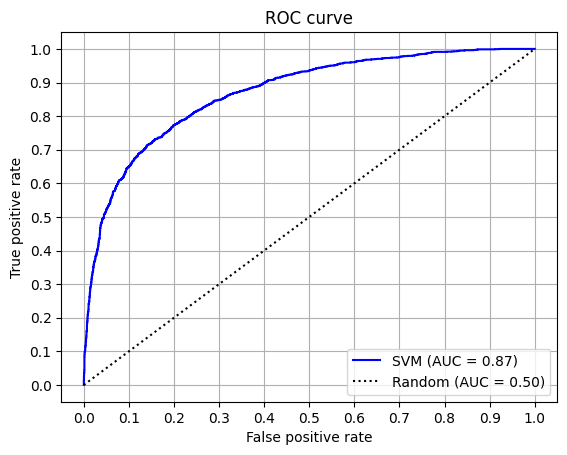

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
fprs, tprs, thresholds = roc_curve(y_test, model.decision_function(X_test))
auc = roc_auc_score(y_test, model.decision_function(X_test))
plt.plot(fprs, tprs, 'b-', label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k:', label='Random (AUC = 0.50)')
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

### 5.2 Utilizando o modelo Floresta Aleatória

a) Encontre as 10 palavras mais importantes desse modelo (get_feature_names_out)

In [45]:
model = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=879, max_depth=100, min_samples_split=6, min_samples_leaf=1))
model.fit(X_train_val, y_train_val)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=100, min_samples_split=6,
                                        n_estimators=879))])

In [47]:
feature_names = model[0].get_feature_names_out()
importances = model[1].feature_importances_

top_10_indices = importances.argsort()[-10:][::-1]

print('10 palavras mais importantes:')
for i in top_10_indices:
    print(f'{feature_names[i]}: {importances[i]:.4f}')

10 palavras mais importantes:
sad: 0.0242
miss: 0.0213
sorry: 0.0191
hate: 0.0171
bad: 0.0118
sucks: 0.0115
love: 0.0100
sick: 0.0097
my: 0.0084
bored: 0.0081


b) Encontre 5 casos onde o modelo errou a classificação no conjunto de teste, mostrando a classificação real e a predita, assim como o tweet em questão


In [32]:
y_pred_test = model.predict(X_test)

idx_erro = np.where(y_test != y_pred_test)[0]

print("5 amostras do conjunto de teste com errou na classificação:")
for i in idx_erro[:5]:
    print(f"Tweet: {X_test.iloc[i]}")
    print(f"Classificação Real: {"Negativo" if y_test.iloc[i] == 1 else "Não Negativo"}")
    print(f"Classificação Predita: {"Negativo" if y_pred_test[i] == 1 else "Não Negativo"}")
    print("-" * 30)

5 amostras do conjunto de teste com errou na classificação:
Tweet: Power Outage, door to freezer propped open, 3G ice cream make for slippy floor  M-er F-er!!
Classificação Real: Negativo
Classificação Predita: Não Negativo
------------------------------
Tweet: listening to those litle hyperbirdies terrorizing the world since 4.30! lets cook em
Classificação Real: Negativo
Classificação Predita: Não Negativo
------------------------------
Tweet: Now i cant find him  Gonna be a sleepless night tonight
Classificação Real: Negativo
Classificação Predita: Não Negativo
------------------------------
Tweet:  OMG!!! That`s a nightmare
Classificação Real: Negativo
Classificação Predita: Não Negativo
------------------------------
Tweet: In a period of exams days are for study and nights for study and sleep... no funny time...
Classificação Real: Negativo
Classificação Predita: Não Negativo
------------------------------


## 6. Conclusão

1. Discorra sobre o que você aprendeu com essa atividade, bem como sobre eventuais dúvidas ou comentários

Este trabalho foi muito interessante em diversos aspectos. O primeiro que me chamou a atenção foi a definição de hiperparâmetros, isso porque como preferi usar o Optuna por questões de dificuldade de hardware, observei que nem sempre ele dá uma boa escolha diretamente, alguns ajustes precisaram ser feitos como o aumento do número de iterações.

O segundo aspecto foi o uso de diferentes algoritmos de árvore de decisão. Como eu ainda não havia tido experiência com alguns deles, foi muito bom poder testá-los e observar os seus desempenhos.

Outro aspecto que me chamou a atenção foi o uso da acurácia balanceada. Ainda quero testar um pouco mais esta questão, mas com certeza é uma técnica muito interessante para ser aplicada.

Por último foi a experiência de fazer um processamente de linguagem natural, apesar de bem simplificado, mas já foi o suficinete para compreender diversas questões do mesmo.

Uma dificuldade que eu tive foi no uso da função de gried_search. Achei muito mais fácil a forma que o Optuna funciona. Ele é mais flexivel e mais transparente, facilitando utilizar a forma de definição do erro mais fácilmente.





2. Quais limitações você enxerga na abordagem utilizada?

As árvores de decição são muito interessantes para dados tabulares, isso devido ao seu potêncial de separar amostras similares. Contudo, no processamento de linguagem natural eu entendo, pela experiencia neste trabalho, que ela não se mostra muito atraente para classificação. Acredito que isso ocorra principalmente devido a sua dificuldade de compreender sentidos/sementica, pois para este caso ela compreende apenas a existência ou não de palavras o que nem sempre é o suficiente, pois algumas (muitas) palavras podem ser utilizadas em ambos os sentidos. Por exemplo, se a palavra pesadelo foi considerada como indicador de negativo, ele vai classificar como negativo, mesmo que as vezes o pesadelo possa estar se referindo a algo ruim e portanto seria uma mensagem neutra ou até mesmo positiva (um dos exemplos de classificação erronea).